<a href="https://colab.research.google.com/github/Rakshithachandrashekhar/QUIZE-app/blob/main/TIME_SERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#install the required library
!pip install yfinance

In [112]:
#import the libraries
import yfinance as yf
import pandas as pd


In [113]:
#downloading the stock data
# Download historical data for TCS from 2019 to 2024
df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")

# Show first 5 rows
df.head()


/tmp/ipython-input-113-335519647.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2019-01-01,1717.572021,1724.071094,1701.504718,1711.433923,1094883
2019-01-02,1736.076172,1746.140686,1715.044269,1719.557544,2100463
2019-01-03,1714.998901,1755.618366,1708.815738,1732.194519,2611668
2019-01-04,1694.147461,1716.127081,1661.787312,1715.043939,4280862
2019-01-07,1713.148193,1722.987151,1697.893309,1707.642022,1856423


In [114]:
#checking the missing value
df.isnull().sum()

,,0
Price,Ticker,
Close,TCS.NS,0
High,TCS.NS,0
Low,TCS.NS,0
Open,TCS.NS,0
Volume,TCS.NS,0


In [115]:
#clean and prepare
# Drop rows with any missing values
df.dropna(inplace=True)

# Reset index (Date is index, make it column)
df.reset_index(inplace=True)

# Keep only 'Date' and 'Close' for now
stock_data = df[['Date', 'Close']]
stock_data.set_index('Date', inplace=True)

# Show cleaned data
stock_data.head()


Price,Close
Ticker,TCS.NS
Date,
2019-01-01,1717.572021
2019-01-02,1736.076172
2019-01-03,1714.998901
2019-01-04,1694.147461
2019-01-07,1713.148193


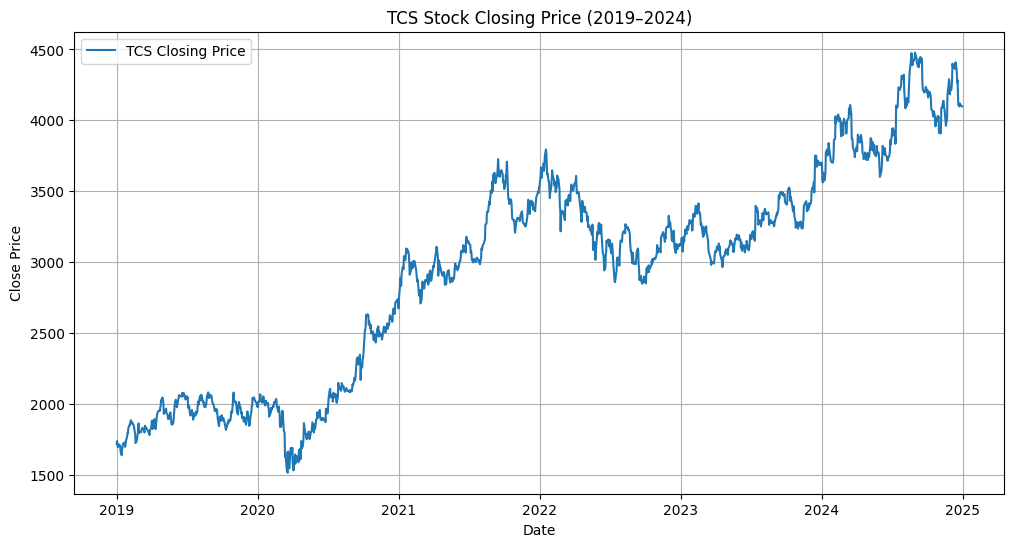

In [116]:
#visulizing the stock prize
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(stock_data, label='TCS Closing Price')
plt.title("TCS Stock Closing Price (2019–2024)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.show()




In [117]:
#instal model
!pip install statsmodels --quiet


In [118]:
#importing the required libraries
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# New Section

In [119]:
import yfinance as yf
import pandas as pd

# Download stock data
df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")

# Clean and preprocess
df.dropna(inplace=True)
df.reset_index(inplace=True)
data = df[['Date', 'Close']]
data.set_index('Date', inplace=True)


/tmp/ipython-input-119-3924742331.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [120]:
#
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

# Summary
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1480
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -7636.607
Date:                Thu, 24 Jul 2025   AIC                          15285.215
Time:                        11:06:02   BIC                          15317.009
Sample:                             0   HQIC                         15297.068
                               - 1480                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0178      0.024      0.731      0.465      -0.030       0.065
ar.L2         -0.0311      0.023     -1.369      0.171      -0.076       0.013
ar.L3         -0.0041      0.023     -0.178      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


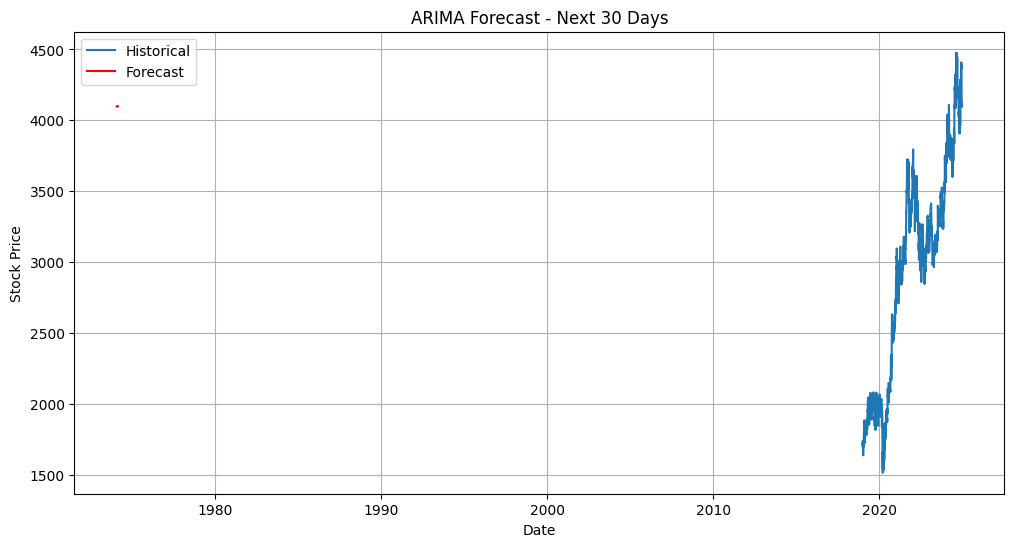

In [121]:
#forecast of nex 30 days
# Forecast 30 steps ahead
forecast = model_fit.forecast(steps=30)

# Plot forecast vs historical
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label="Historical")
plt.plot(forecast.index, forecast, label="Forecast", color='red')
plt.title("ARIMA Forecast - Next 30 Days")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()


In [122]:
#install prophet model
!pip install prophet --quiet


In [123]:
import yfinance as yf
import pandas as pd

# Download stock data
df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")

# Clean and preprocess
df.dropna(inplace=True)
df.reset_index(inplace=True)
data = df[['Date', 'Close']]
data.set_index('Date', inplace=True)


/tmp/ipython-input-123-3924742331.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [124]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [125]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [126]:
# Download TCS stock data
df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
df.dropna(inplace=True)

# Prophet needs: 'ds' = date, 'y' = value
prophet_df = df.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})


/tmp/ipython-input-126-1471901551.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [127]:
# Step 1: Import libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet


In [128]:
# Step 2: Download stock data (TCS from Yahoo Finance)
df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
df = df[['Close']].dropna()
df.reset_index(inplace=True)


/tmp/ipython-input-128-2209263381.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TCS.NS", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [129]:
# Step 3: Prepare data for Prophet
prophet_df = pd.DataFrame()
prophet_df['ds'] = pd.to_datetime(df['Date'])       # Convert to datetime
prophet_df['y'] = df['Close'].astype(float)         # Ensure y is numeric (1-D)


In [130]:
# Step 4: Create and fit the model
model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxsb_ztr5/bt6q4f3f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxsb_ztr5/dxjp4ob5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55675', 'data', 'file=/tmp/tmpxsb_ztr5/bt6q4f3f.json', 'init=/tmp/tmpxsb_ztr5/dxjp4ob5.json', 'output', 'file=/tmp/tmpxsb_ztr5/prophet_modelc4infu_k/prophet_model-20250724110615.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:06:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:06:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [131]:
# Step 5: Forecast the next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


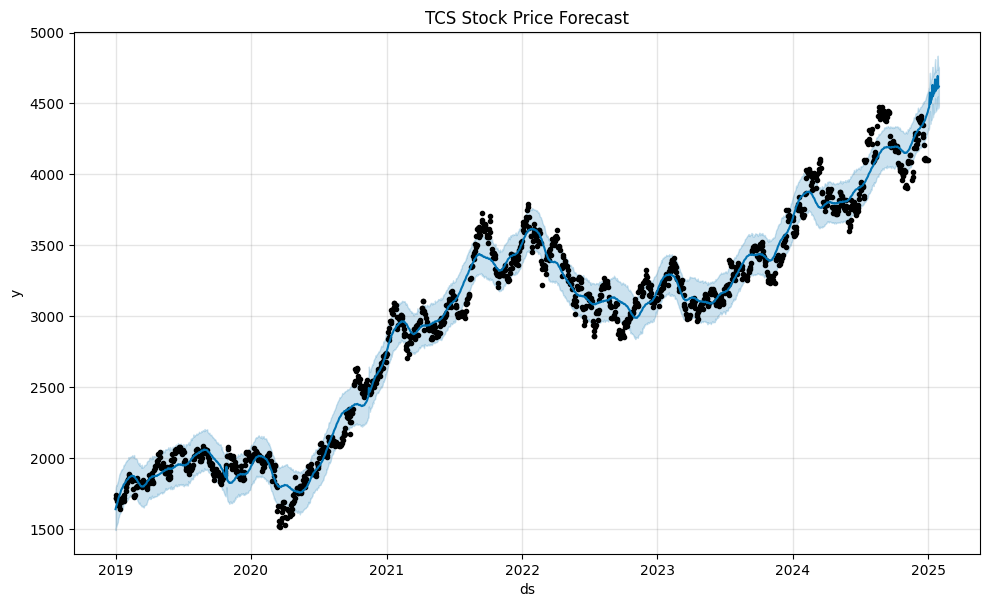

In [132]:
# Step 6: Plot forecast
fig = model.plot(forecast)
plt.title("TCS Stock Price Forecast")
plt.show()


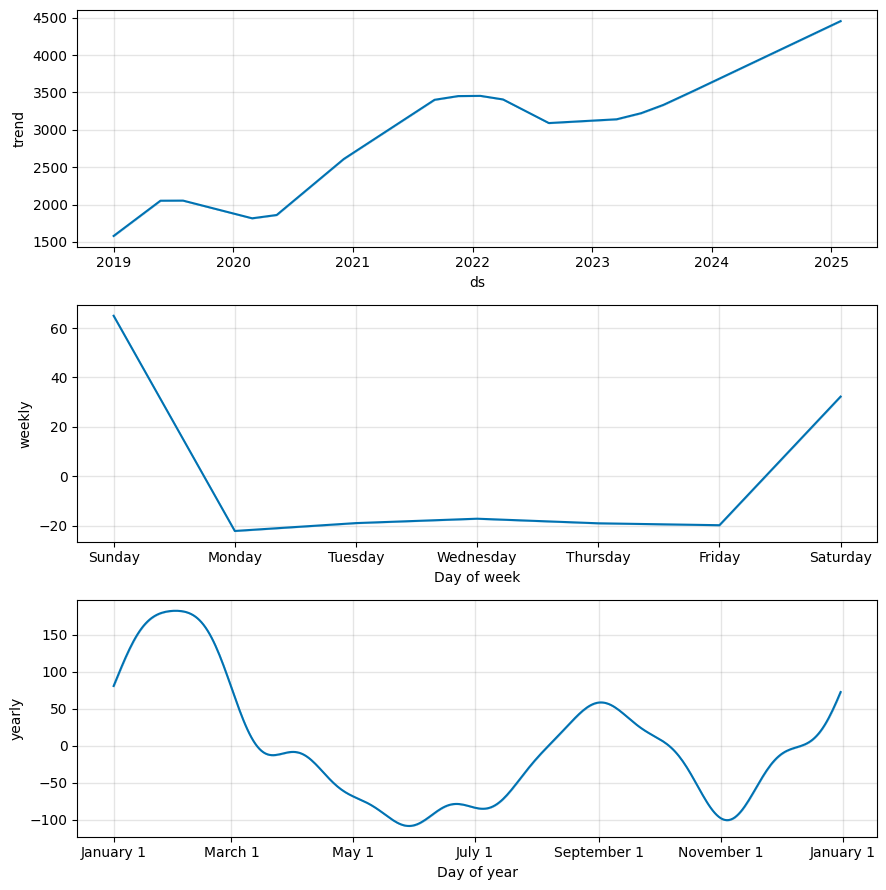

In [133]:
model.plot_components(forecast)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


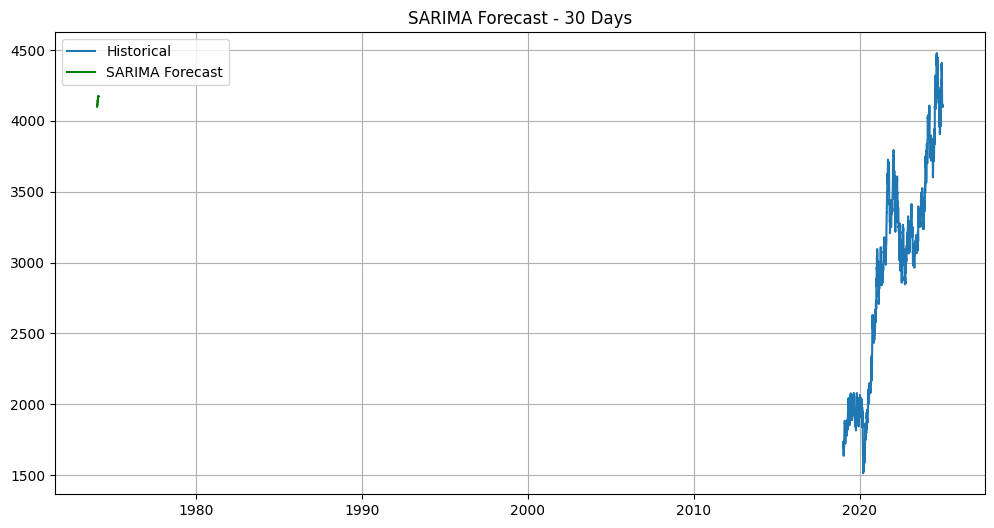

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Seasonal Order: (P,D,Q,s), s=12 for yearly seasonality if monthly data
sarima_model = SARIMAX(data['Close'], order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(30)

# Plot
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Historical')
plt.plot(sarima_forecast.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.title("SARIMA Forecast - 30 Days")
plt.legend()
plt.grid(True)
plt.show()


In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [136]:
!pip install yfinance
import yfinance as yf

data = yf.download('TCS.NS', start='2018-01-01', end='2024-12-31')
data.to_csv('TCS.NS_stock_data.csv')


/tmp/ipython-input-136-221933633.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TCS.NS', start='2018-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [137]:
print(df.columns)


MultiIndex([( 'Date',       ''),
            ('Close', 'TCS.NS')],
           names=['Price', 'Ticker'])


In [138]:
!pip install yfinance


In [139]:
import yfinance as yf
import pandas as pd

# Download historical data for TCS.NS from Yahoo Finance
ticker = "TCS.NS"
df = yf.download(ticker, start="2015-01-01", end="2024-12-31")

# Save it as a CSV (optional)
df.to_csv("TCS.NS_stock_data.csv")

# Preview the data
df.head()


/tmp/ipython-input-139-3487575265.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-01-01,1073.510498,1082.556381,1071.591649,1082.556381,366830
2015-01-02,1087.806274,1092.656057,1075.639707,1075.808354,925740
2015-01-05,1071.275269,1096.430850,1064.696389,1088.460375,1754242
2015-01-06,1031.781128,1066.573059,1028.997732,1066.573059,2423784
2015-01-07,1019.593506,1045.508207,1015.270871,1041.649506,2636332


In [140]:
# Select only the 'Close' price column
close_prices = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_prices)

In [141]:
X = []
y = []

for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM: [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [142]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [143]:
model.fit(X, y, epochs=10, batch_size=32)


Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - loss: 0.0323
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 137ms/step - loss: 5.5346e-04
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 5.2614e-04
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 5.8168e-04
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 5.1960e-04
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 4.3056e-04
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 4.3575e-04
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 3.9610e-04
Epoch 9/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 3.7894e-04
Epoch 10/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 3.3917e-04


In [144]:
# Use only the 'Close' values for prediction if model was trained on 'Close' only
# Get the last 60 days of scaled data
last_60_days = scaled_data[-60:]

# Reshape for LSTM: [samples, timesteps, features]
X_test = last_60_days.reshape((1, 60, 1))

In [145]:
# Before scaling
close_scaler = MinMaxScaler()
close_data = close_scaler.fit_transform(df[['Close']])


In [146]:
predicted_price_original = close_scaler.inverse_transform(predicted_price)
print("Predicted Close Price:", predicted_price_original[0][0])


Predicted Close Price: 1954439.9


In [147]:
scaled_value = predicted_price[0][0]
min_close = scaler.data_min_[0]
max_close = scaler.data_max_[0]

original_value = scaled_value * (max_close - min_close) + min_close
print("Predicted Close Price:", original_value)

Predicted Close Price: 1954439.7849883102


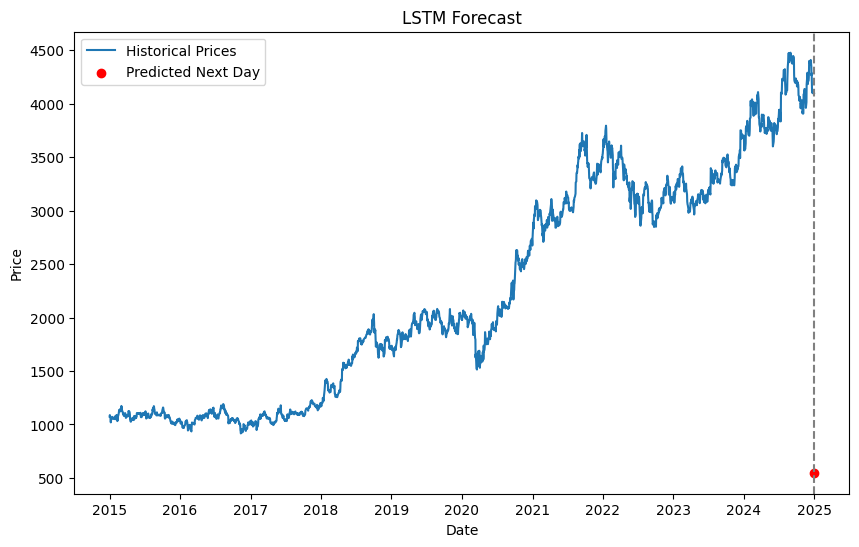

In [148]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='Historical Prices')
plt.axvline(x=df.index[-1], color='gray', linestyle='--')
plt.scatter(df.index[-1] + pd.Timedelta(days=1), predicted_price[0][0], color='red', label='Predicted Next Day')
plt.title("LSTM Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [149]:
import pandas as pd

df = pd.read_csv('TCS.NS_stock_data.csv')
print(df.columns)


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [150]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data
df = pd.read_csv('TCS.NS_stock_data.csv')
print("Columns:", df.columns)

# If date column exists and is needed
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Keep only the 'Close' column
data = df[['Close']].dropna()

# Continue with scaler, sequence creation etc.


Columns: Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [151]:
# Save the model for future use
model.save("lstm_stock_model.h5")

# Save the plot
plt.savefig("forecast_plot.png")

# Save the predicted value
with open("predicted_price.txt", "w") as f:
    f.write(f"Predicted Close Price: {predicted_price[0][0]:.2f}")


<Figure size 640x480 with 0 Axes>

In [152]:
import pandas as pd

df = pd.read_csv("TCS.NS_stock_data.csv")
print("📄 Column names in your CSV:")
print(df.columns)


📄 Column names in your CSV:
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [153]:
df = pd.read_csv("TCS.NS_stock_data.csv")

# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
else:
    print("⚠️ 'Date' column not found. Check your CSV headers!")


⚠️ 'Date' column not found. Check your CSV headers!


In [154]:
# Re-read the file to ensure clean data
df = pd.read_csv("TCS.NS_stock_data.csv")

# Check column names (sometimes there's an extra unnamed column)
print(df.columns)

# Drop non-numeric or identifier columns if they exist
# Keep only the 'Close' column (after ensuring it's numeric)
if 'Close' in df.columns:
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')  # Convert non-numeric to NaN
    df = df.dropna(subset=['Close'])  # Remove rows with NaN Close

    # Now scale
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = df[['Close']].values
    scaled_data = scaler.fit_transform(data)
else:
    print("⚠️ 'Close' column not found.")


Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [155]:
print(df.head())
print(df.dtypes)


        Price        Close                High                 Low  \
2  2015-01-01  1073.510498  1082.5563809892283  1071.5916494326564   
3  2015-01-02  1087.806274  1092.6560572718683  1075.6397070201242   
4  2015-01-05  1071.275269  1096.4308497583336  1064.6963889931567   
5  2015-01-06  1031.781128  1066.5730594495722  1028.9977322244656   
6  2015-01-07  1019.593506  1045.5082067799135  1015.2708712702512   

                 Open   Volume  
2  1082.5563809892283   366830  
3  1075.8083539359081   925740  
4  1088.4603752148996  1754242  
5  1066.5730594495722  2423784  
6  1041.6495058669184  2636332  
Price      object
Close     float64
High       object
Low        object
Open       object
Volume     object
dtype: object


In [156]:
# Rebuild and compile the model before predicting
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Now make the prediction
last_60_days = scaled_data[-60:].reshape(1, 60, 1)
predicted_price_scaled = model.predict(last_60_days)

# Inverse transform the prediction
# Ensure the shape is correct for inverse_transform
if predicted_price_scaled.shape == (1, 1):
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
else:
    # Handle cases where the shape might be different, though unlikely for a single prediction
    print("Warning: Predicted price scaled has unexpected shape:", predicted_price_scaled.shape)
    predicted_price = scaler.inverse_transform(predicted_price_scaled.reshape(-1, 1))


print("📅 Predicted next day's stock price:", predicted_price[0][0])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 482ms/step
📅 Predicted next day's stock price: 1208.1102


In [157]:
# Assuming X and y are already created from previous steps
X = np.array(X)
y = np.array(y)

# Split into training and testing sets
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


In [158]:
# Assuming X and y are already created from previous steps
X = np.array(X)
y = np.array(y)

# Split into training and testing sets
split = int(0.8 * len(X))        # 80% for training
X_train, y_train = X[:split], y[:split]   # First 80% of data
X_test, y_test = X[split:], y[split:]     # Remaining 20% of data


In [159]:
# Predict on test data
predicted_stock_price = model.predict(X_test)

# Inverse transform predictions and actual prices
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

mse = mean_squared_error(actual_stock_price, predicted_stock_price)
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
rmse = np.sqrt(mse)

print("📊 Model Evaluation Metrics:")
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
📊 Model Evaluation Metrics:
MSE: 6348484.393875476
MAE: 2489.2812044135762
RMSE: 2519.6198907524677


In [160]:
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))


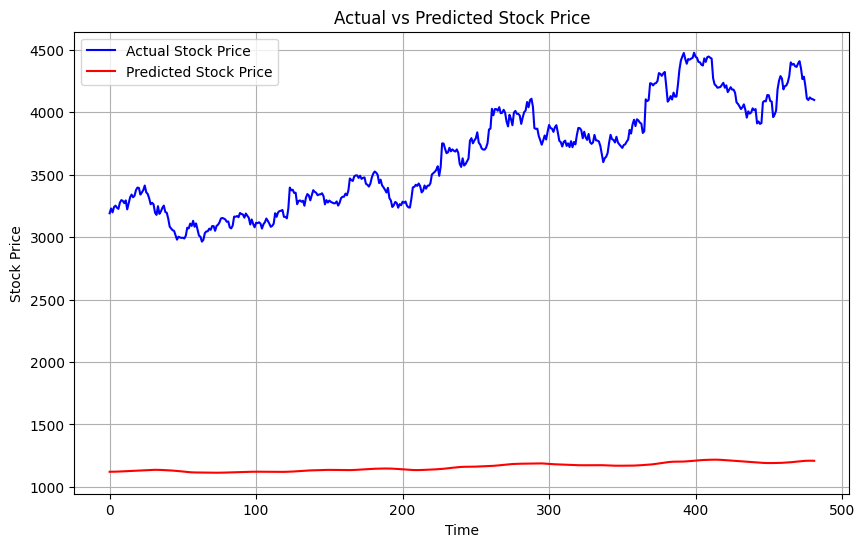

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(actual_stock_price, color='blue', label='Actual Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title('Actual vs Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()
